# UniTVelo benchmark on dyngen data

Notebook benchmarks velocity and latent time inference using UniTVelo on dyngen-generated data.

## Library imports

In [1]:
import os

import numpy as np
import pandas as pd

import anndata as ad
import scvelo as scv
import unitvelo as utv

from rgv_tools import DATA_DIR
from rgv_tools.benchmarking import get_velocity_correlation

(Running UniTVelo 0.2.5.2)
2025-04-29 09:06:35


2025-04-29 11:07:21.673619: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745917642.356194 4127427 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745917642.712885 4127427 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745917644.057376 4127427 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745917644.057407 4127427 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745917644.057410 4127427 computation_placer.cc:177] computation placer alr

## General setting

In [2]:
scv.settings.verbosity = 3

In [3]:
velo_config = utv.config.Configuration()
velo_config.R2_ADJUST = True
velo_config.IROOT = None
velo_config.FIT_OPTION = "1"
velo_config.AGENES_R2 = 1
velo_config.GPU = -1

In [4]:
os.environ["TF_USE_LEGACY_KERAS"] = "True"

## Constants

In [5]:
DATASET = "dyngen"

In [6]:
COMPLEXITY = "complexity_1"

In [7]:
SAVE_DATA = True
if SAVE_DATA:
    (DATA_DIR / DATASET / COMPLEXITY / "results").mkdir(parents=True, exist_ok=True)

In [8]:
SAVE_DATASETS = True
if SAVE_DATASETS:
    (DATA_DIR / DATASET / COMPLEXITY / "trained_unitvelo").mkdir(parents=True, exist_ok=True)

## Velocity pipeline

Run 0, dataset 29.
------> Manully Specified Parameters <------
GPU:	-1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /ictstr01/groups/ml01/workspace/yifan.chen/regvelo_reproducibility/notebooks/dyngen/complexity_1.
Results will be stored in res folder
Filtered out 83 genes that are detected 20 counts (shared).
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
Logarithmized X.
Extracted 279 highly variable genes.
Computing moments for 279 genes with n_neighbors: 30 and n_pcs: 30
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)



/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


# of velocity genes 276 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 276 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 276 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.


Loss (Total): 17.883, (Spliced): 8.419, (Unspliced): 9.464:  87%|████████▋ | 10396/12000 [03:08<00:28, 56.09it/s]/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


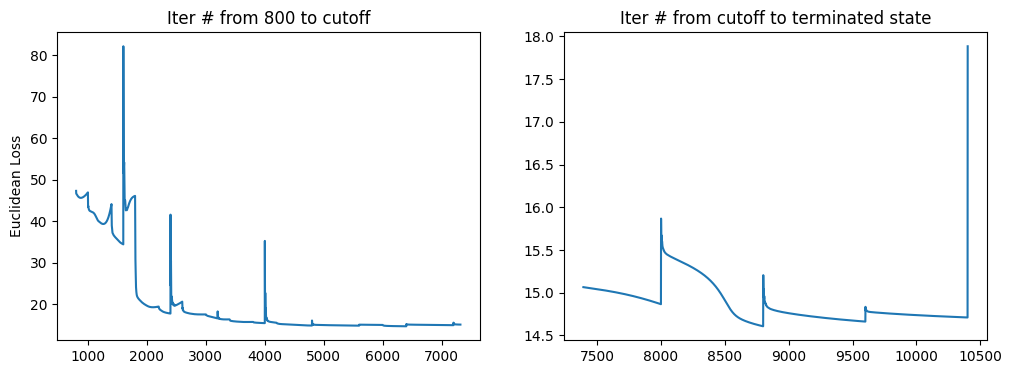

/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Loss (Total): 17.883, (Spliced): 8.419, (Unspliced): 9.464:  87%|████████▋ | 10401/12000 [03:12<00:29, 54.05it/s]

Total loss 14.608, vgene loss 17.883


  0%|          | 0/1000 [00:00<?, ?cells/s]

... storing 'cluster' as categorical


Run 1, dataset 14.
------> Manully Specified Parameters <------
GPU:	-1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /ictstr01/groups/ml01/workspace/yifan.chen/regvelo_reproducibility/notebooks/dyngen/complexity_1.
Results will be stored in res folder


/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Extracted 659 highly variable genes.
Computing moments for 659 genes with n_neighbors: 30 and n_pcs: 30

# of velocity genes 610 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 610 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 610 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.


Loss (Total): 383.393, (Spliced): 203.546, (Unspliced): 179.847:  93%|█████████▎| 11197/12000 [04:50<00:19, 40.47it/s]

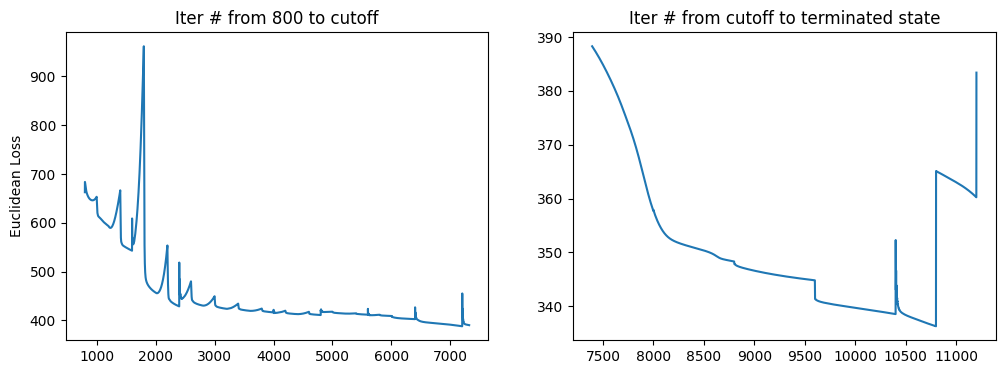

/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Loss (Total): 383.393, (Spliced): 203.546, (Unspliced): 179.847:  93%|█████████▎| 11201/12000 [04:55<00:21, 37.88it/s]

Total loss 336.294, vgene loss 383.393


  0%|          | 0/1000 [00:00<?, ?cells/s]

... storing 'cluster' as categorical


Run 2, dataset 24.
------> Manully Specified Parameters <------
GPU:	-1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /ictstr01/groups/ml01/workspace/yifan.chen/regvelo_reproducibility/notebooks/dyngen/complexity_1.
Results will be stored in res folder


/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Extracted 726 highly variable genes.
Computing moments for 726 genes with n_neighbors: 30 and n_pcs: 30

# of velocity genes 393 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 393 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 393 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.


Loss (Total): 26753081.323, (Spliced): 13268335.389, (Unspliced): 13484745.934: 100%|█████████▉| 11997/12000 [04:53<00:00, 37.32it/s]  

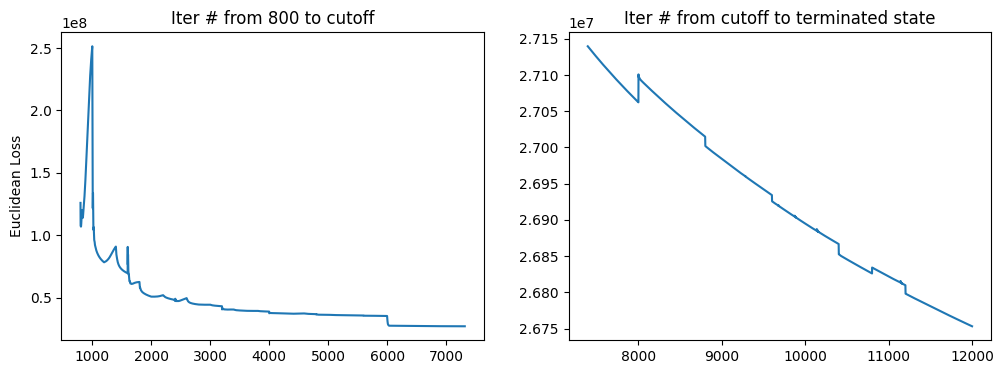

/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Loss (Total): 26753081.323, (Spliced): 13268335.389, (Unspliced): 13484745.934: 100%|█████████▉| 11999/12000 [04:57<00:00, 40.36it/s]

Total loss 26753081.323, vgene loss 26753081.323


  0%|          | 0/1000 [00:00<?, ?cells/s]

... storing 'cluster' as categorical


Run 3, dataset 28.
------> Manully Specified Parameters <------
GPU:	-1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /ictstr01/groups/ml01/workspace/yifan.chen/regvelo_reproducibility/notebooks/dyngen/complexity_1.
Results will be stored in res folder


/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Extracted 457 highly variable genes.
Computing moments for 457 genes with n_neighbors: 30 and n_pcs: 30

# of velocity genes 454 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 454 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 454 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.


Loss (Total): 44.703, (Spliced): 21.389, (Unspliced): 23.315:  80%|████████  | 9600/12000 [03:15<00:48, 49.95it/s] 

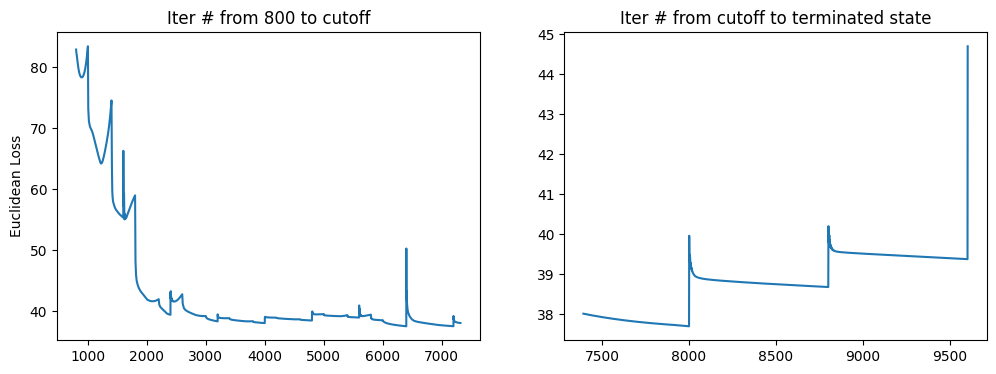

/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Loss (Total): 44.703, (Spliced): 21.389, (Unspliced): 23.315:  80%|████████  | 9601/12000 [03:18<00:49, 48.32it/s]

Total loss 37.695, vgene loss 44.703


  0%|          | 0/1000 [00:00<?, ?cells/s]

... storing 'cluster' as categorical


Run 4, dataset 6.
------> Manully Specified Parameters <------
GPU:	-1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /ictstr01/groups/ml01/workspace/yifan.chen/regvelo_reproducibility/notebooks/dyngen/complexity_1.
Results will be stored in res folder


/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Extracted 745 highly variable genes.
Computing moments for 745 genes with n_neighbors: 30 and n_pcs: 30

# of velocity genes 451 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 451 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 451 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.


Loss (Total): 149047663.823, (Spliced): 73239404.417, (Unspliced): 75808259.406: 100%|█████████▉| 11996/12000 [05:00<00:00, 37.27it/s] 

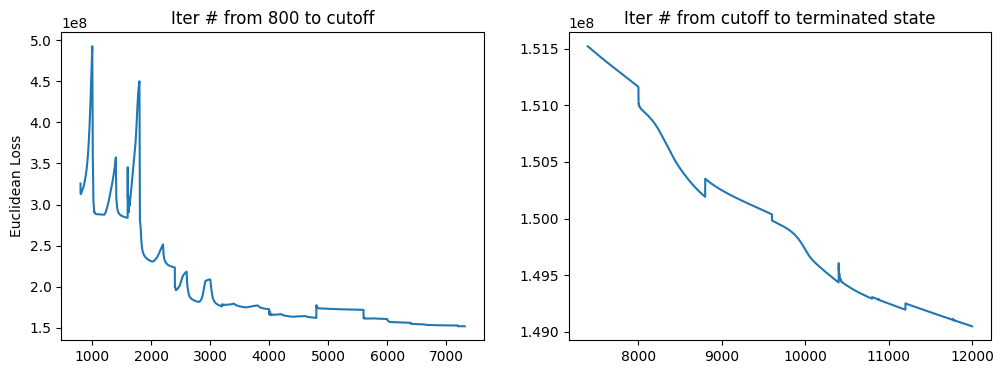

/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Loss (Total): 149047663.823, (Spliced): 73239404.417, (Unspliced): 75808259.406: 100%|█████████▉| 11999/12000 [05:04<00:00, 39.36it/s]

Total loss 149047663.823, vgene loss 149047663.823


  0%|          | 0/1000 [00:00<?, ?cells/s]

... storing 'cluster' as categorical


Run 5, dataset 21.
------> Manully Specified Parameters <------
GPU:	-1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /ictstr01/groups/ml01/workspace/yifan.chen/regvelo_reproducibility/notebooks/dyngen/complexity_1.
Results will be stored in res folder


/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Extracted 442 highly variable genes.
Computing moments for 442 genes with n_neighbors: 30 and n_pcs: 30

# of velocity genes 392 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 392 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 392 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.


Loss (Total): 475.306, (Spliced): 231.867, (Unspliced): 243.439:  87%|████████▋ | 10397/12000 [03:33<00:32, 49.74it/s]

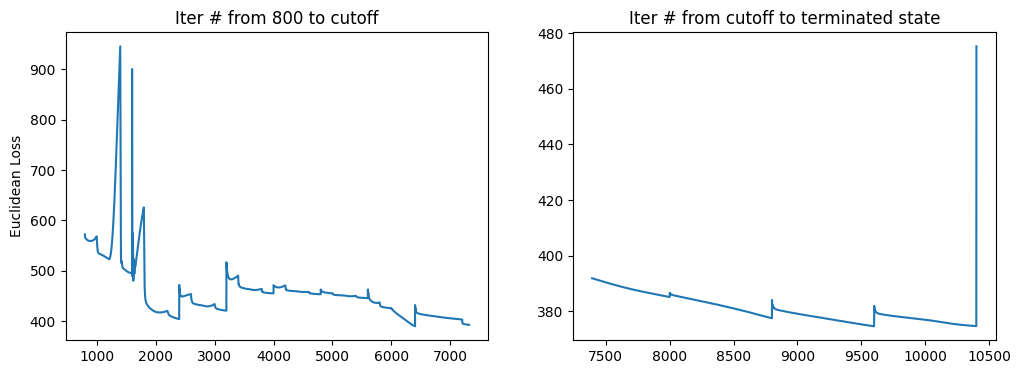

/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Loss (Total): 475.306, (Spliced): 231.867, (Unspliced): 243.439:  87%|████████▋ | 10401/12000 [03:36<00:33, 48.15it/s]

Total loss 374.615, vgene loss 475.306


  0%|          | 0/1000 [00:00<?, ?cells/s]

... storing 'cluster' as categorical


Run 6, dataset 15.
------> Manully Specified Parameters <------
GPU:	-1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /ictstr01/groups/ml01/workspace/yifan.chen/regvelo_reproducibility/notebooks/dyngen/complexity_1.
Results will be stored in res folder


/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Extracted 430 highly variable genes.
Computing moments for 430 genes with n_neighbors: 30 and n_pcs: 30

# of velocity genes 414 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 414 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 414 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.


Loss (Total): 80.207, (Spliced): 34.800, (Unspliced): 45.407:  73%|███████▎  | 8800/12000 [02:54<01:03, 50.50it/s]  

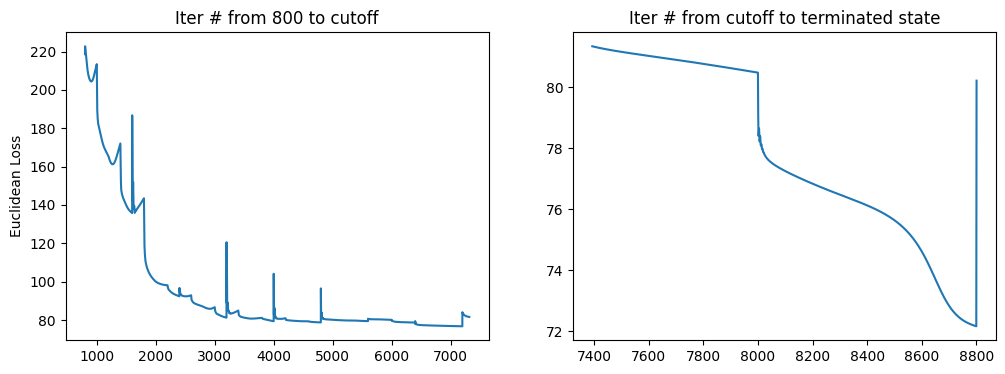

/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Loss (Total): 80.207, (Spliced): 34.800, (Unspliced): 45.407:  73%|███████▎  | 8801/12000 [02:57<01:04, 49.45it/s]

Total loss 72.159, vgene loss 80.207


  0%|          | 0/1000 [00:00<?, ?cells/s]

... storing 'cluster' as categorical


Run 7, dataset 9.
------> Manully Specified Parameters <------
GPU:	-1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /ictstr01/groups/ml01/workspace/yifan.chen/regvelo_reproducibility/notebooks/dyngen/complexity_1.
Results will be stored in res folder


/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Extracted 336 highly variable genes.
Computing moments for 336 genes with n_neighbors: 30 and n_pcs: 30

# of velocity genes 335 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 335 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 335 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.


Loss (Total): 30.960, (Spliced): 20.727, (Unspliced): 10.233:  90%|████████▉ | 10797/12000 [03:26<00:23, 52.28it/s]

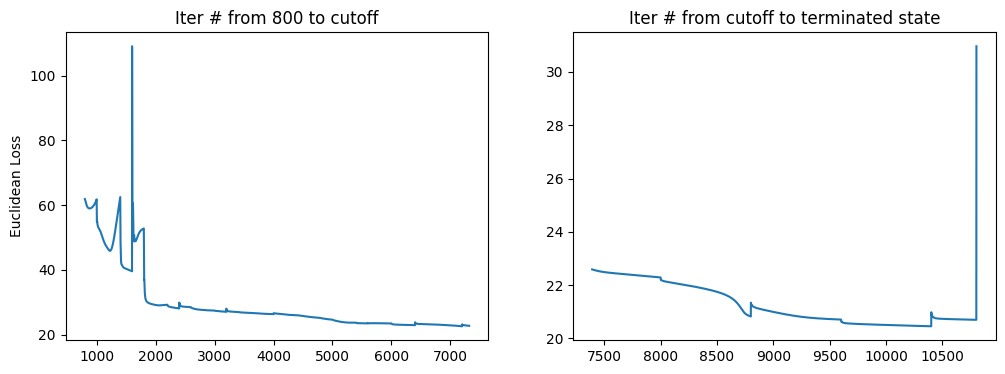

/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Loss (Total): 30.960, (Spliced): 20.727, (Unspliced): 10.233:  90%|█████████ | 10801/12000 [03:28<00:23, 51.72it/s]

Total loss 20.457, vgene loss 30.960


  0%|          | 0/1000 [00:00<?, ?cells/s]

... storing 'cluster' as categorical


Run 8, dataset 12.
------> Manully Specified Parameters <------
GPU:	-1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /ictstr01/groups/ml01/workspace/yifan.chen/regvelo_reproducibility/notebooks/dyngen/complexity_1.
Results will be stored in res folder


/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Extracted 515 highly variable genes.
Computing moments for 515 genes with n_neighbors: 30 and n_pcs: 30

# of velocity genes 376 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 364 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 364 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.


Loss (Total): 78624753.934, (Spliced): 38081184.352, (Unspliced): 40543569.582: 100%|█████████▉| 11999/12000 [04:07<00:00, 44.44it/s] 

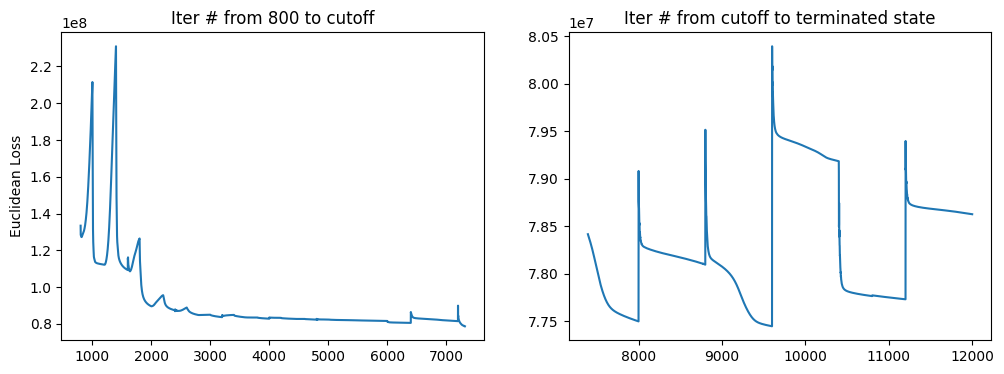

/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Loss (Total): 78624753.934, (Spliced): 38081184.352, (Unspliced): 40543569.582: 100%|█████████▉| 11999/12000 [04:10<00:00, 47.91it/s]

Total loss 77444636.132, vgene loss 78624753.934


  0%|          | 0/880 [00:00<?, ?cells/s]

... storing 'cluster' as categorical


Run 9, dataset 19.
------> Manully Specified Parameters <------
GPU:	-1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /ictstr01/groups/ml01/workspace/yifan.chen/regvelo_reproducibility/notebooks/dyngen/complexity_1.
Results will be stored in res folder


/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Extracted 233 highly variable genes.
Computing moments for 233 genes with n_neighbors: 30 and n_pcs: 30

# of velocity genes 232 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 232 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 232 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.


Loss (Total): 59.264, (Spliced): 31.631, (Unspliced): 27.632:  90%|████████▉ | 10797/12000 [03:00<00:20, 58.00it/s] 

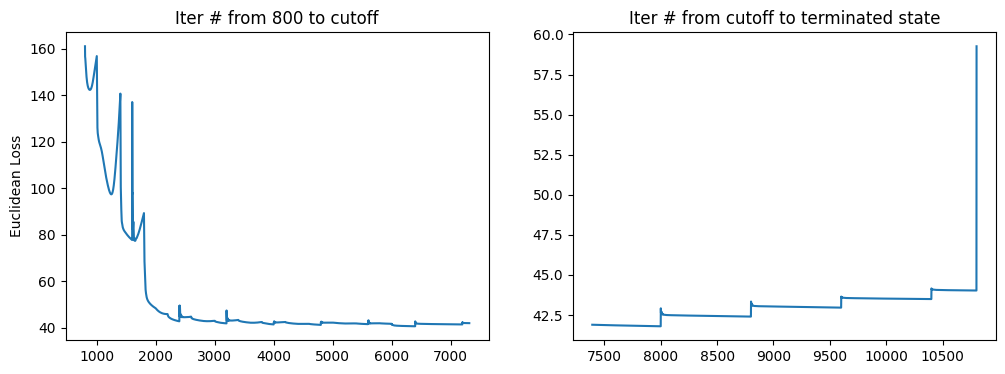

/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Loss (Total): 59.264, (Spliced): 31.631, (Unspliced): 27.632:  90%|█████████ | 10801/12000 [03:02<00:20, 59.18it/s]

Total loss 41.794, vgene loss 59.264


  0%|          | 0/1000 [00:00<?, ?cells/s]

... storing 'cluster' as categorical


Run 10, dataset 4.
------> Manully Specified Parameters <------
GPU:	-1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /ictstr01/groups/ml01/workspace/yifan.chen/regvelo_reproducibility/notebooks/dyngen/complexity_1.
Results will be stored in res folder


/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Extracted 403 highly variable genes.
Computing moments for 403 genes with n_neighbors: 30 and n_pcs: 30

# of velocity genes 401 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 401 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 401 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.


Loss (Total): 44.620, (Spliced): 26.473, (Unspliced): 18.147:  90%|████████▉ | 10798/12000 [03:39<00:23, 50.53it/s]

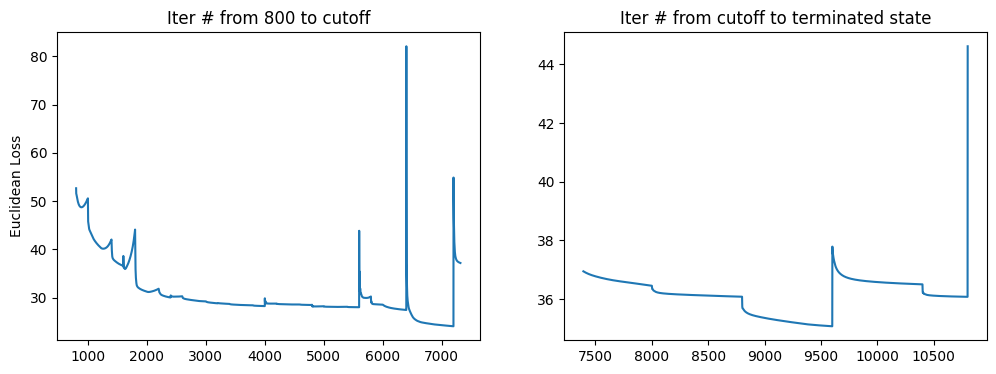

/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Loss (Total): 44.620, (Spliced): 26.473, (Unspliced): 18.147:  90%|█████████ | 10801/12000 [03:42<00:24, 48.48it/s]

Total loss 35.070, vgene loss 44.620


  0%|          | 0/1000 [00:00<?, ?cells/s]

... storing 'cluster' as categorical


Run 11, dataset 13.
------> Manully Specified Parameters <------
GPU:	-1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /ictstr01/groups/ml01/workspace/yifan.chen/regvelo_reproducibility/notebooks/dyngen/complexity_1.
Results will be stored in res folder


/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Extracted 394 highly variable genes.
Computing moments for 394 genes with n_neighbors: 30 and n_pcs: 30

# of velocity genes 393 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 393 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 393 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.


Loss (Total): 47.101, (Spliced): 23.363, (Unspliced): 23.737:  80%|███████▉  | 9598/12000 [03:11<00:47, 50.70it/s] 

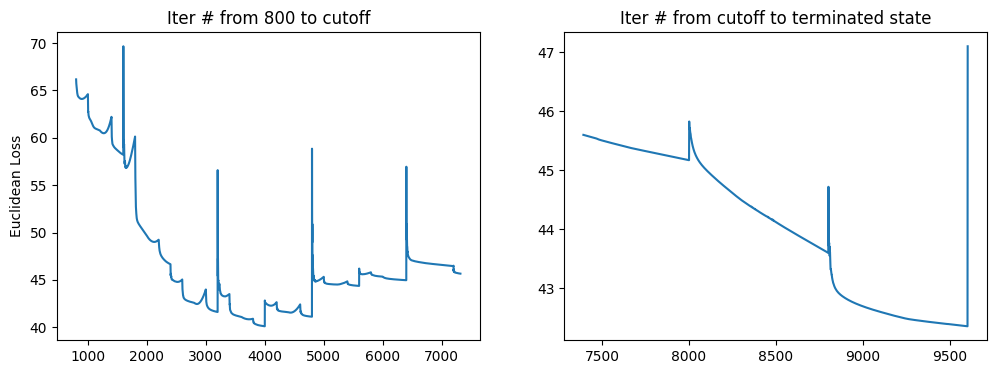

/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Loss (Total): 47.101, (Spliced): 23.363, (Unspliced): 23.737:  80%|████████  | 9601/12000 [03:14<00:48, 49.35it/s]

Total loss 42.355, vgene loss 47.101


  0%|          | 0/1000 [00:00<?, ?cells/s]

... storing 'cluster' as categorical


Run 12, dataset 2.
------> Manully Specified Parameters <------
GPU:	-1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /ictstr01/groups/ml01/workspace/yifan.chen/regvelo_reproducibility/notebooks/dyngen/complexity_1.
Results will be stored in res folder


/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Extracted 690 highly variable genes.
Computing moments for 690 genes with n_neighbors: 30 and n_pcs: 30

# of velocity genes 385 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 385 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 385 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.


Loss (Total): 29240576.665, (Spliced): 14302426.099, (Unspliced): 14938150.566: 100%|█████████▉| 11998/12000 [04:47<00:00, 38.02it/s] 

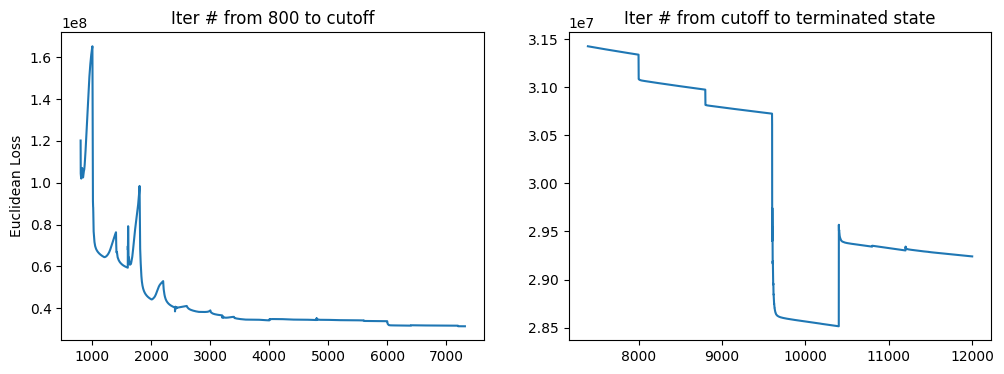

/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Loss (Total): 29240576.665, (Spliced): 14302426.099, (Unspliced): 14938150.566: 100%|█████████▉| 11999/12000 [04:51<00:00, 41.13it/s]

Total loss 28514455.605, vgene loss 29240576.665


  0%|          | 0/1000 [00:00<?, ?cells/s]

... storing 'cluster' as categorical


Run 13, dataset 16.
------> Manully Specified Parameters <------
GPU:	-1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /ictstr01/groups/ml01/workspace/yifan.chen/regvelo_reproducibility/notebooks/dyngen/complexity_1.
Results will be stored in res folder


/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Extracted 509 highly variable genes.
Computing moments for 509 genes with n_neighbors: 30 and n_pcs: 30

# of velocity genes 472 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 472 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 472 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.


Loss (Total): 75.340, (Spliced): 43.423, (Unspliced): 31.917:  90%|████████▉ | 10799/12000 [03:52<00:25, 47.62it/s]

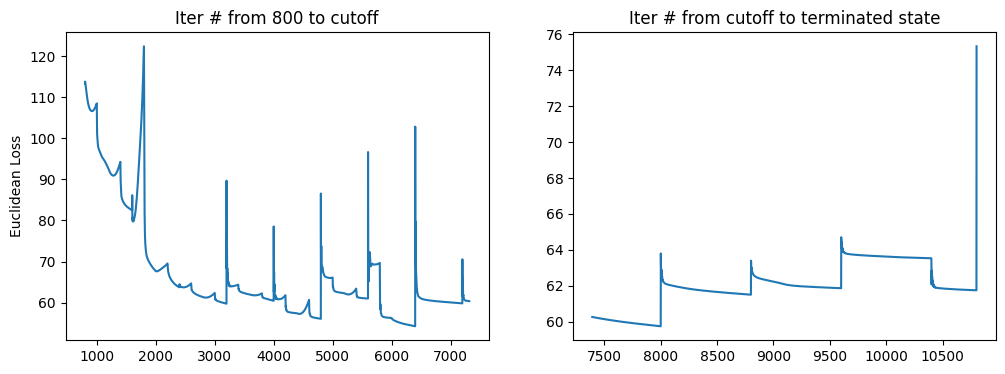

/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Loss (Total): 75.340, (Spliced): 43.423, (Unspliced): 31.917:  90%|█████████ | 10801/12000 [03:55<00:26, 45.91it/s]

Total loss 59.735, vgene loss 75.340


  0%|          | 0/1000 [00:00<?, ?cells/s]

... storing 'cluster' as categorical


Run 14, dataset 1.
------> Manully Specified Parameters <------
GPU:	-1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /ictstr01/groups/ml01/workspace/yifan.chen/regvelo_reproducibility/notebooks/dyngen/complexity_1.
Results will be stored in res folder


/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Extracted 268 highly variable genes.
Computing moments for 268 genes with n_neighbors: 30 and n_pcs: 30

# of velocity genes 264 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 264 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 264 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.


Loss (Total): 37.876, (Spliced): 19.851, (Unspliced): 18.025:  67%|██████▋   | 7998/12000 [02:15<01:10, 56.72it/s] 

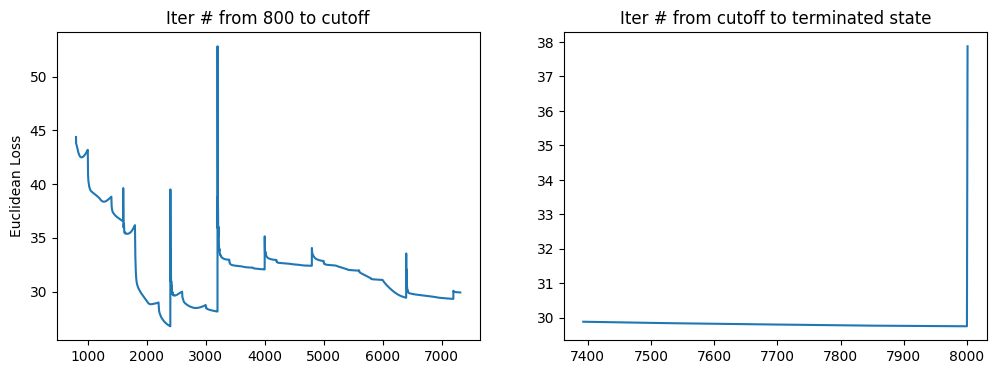

/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Loss (Total): 37.876, (Spliced): 19.851, (Unspliced): 18.025:  67%|██████▋   | 8001/12000 [02:17<01:08, 58.02it/s]

Total loss 29.758, vgene loss 37.876


  0%|          | 0/1000 [00:00<?, ?cells/s]

... storing 'cluster' as categorical


Run 15, dataset 18.
------> Manully Specified Parameters <------
GPU:	-1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /ictstr01/groups/ml01/workspace/yifan.chen/regvelo_reproducibility/notebooks/dyngen/complexity_1.
Results will be stored in res folder


/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Extracted 335 highly variable genes.
Computing moments for 335 genes with n_neighbors: 30 and n_pcs: 30

# of velocity genes 307 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 307 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 307 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.


Loss (Total): 349.261, (Spliced): 170.470, (Unspliced): 178.791:  80%|███████▉  | 9596/12000 [02:59<00:45, 52.35it/s] 

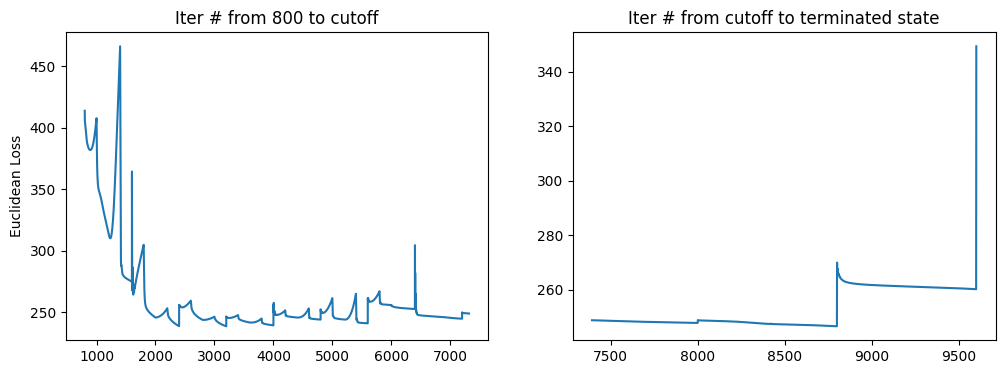

/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Loss (Total): 349.261, (Spliced): 170.470, (Unspliced): 178.791:  80%|████████  | 9601/12000 [03:01<00:45, 52.89it/s]

Total loss 246.523, vgene loss 349.261


  0%|          | 0/1000 [00:00<?, ?cells/s]

... storing 'cluster' as categorical


Run 16, dataset 5.
------> Manully Specified Parameters <------
GPU:	-1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /ictstr01/groups/ml01/workspace/yifan.chen/regvelo_reproducibility/notebooks/dyngen/complexity_1.
Results will be stored in res folder


/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Extracted 226 highly variable genes.
Computing moments for 226 genes with n_neighbors: 30 and n_pcs: 30

# of velocity genes 226 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 226 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 226 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.


Loss (Total): 28.367, (Spliced): 17.661, (Unspliced): 10.706:  90%|████████▉ | 10798/12000 [02:58<00:20, 58.57it/s]

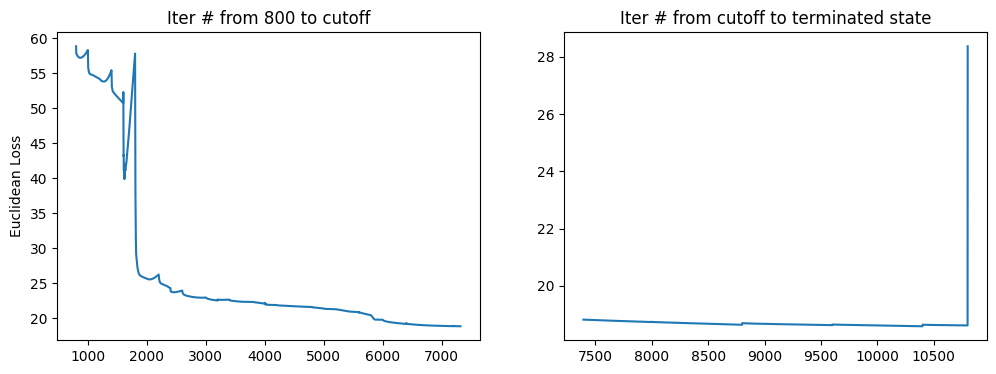

/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Loss (Total): 28.367, (Spliced): 17.661, (Unspliced): 10.706:  90%|█████████ | 10801/12000 [03:00<00:20, 59.93it/s]

Total loss 18.587, vgene loss 28.367


  0%|          | 0/1000 [00:00<?, ?cells/s]

... storing 'cluster' as categorical


Run 17, dataset 10.
------> Manully Specified Parameters <------
GPU:	-1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /ictstr01/groups/ml01/workspace/yifan.chen/regvelo_reproducibility/notebooks/dyngen/complexity_1.
Results will be stored in res folder


/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Extracted 547 highly variable genes.
Computing moments for 547 genes with n_neighbors: 30 and n_pcs: 30

# of velocity genes 279 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 279 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 279 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.


Loss (Total): 105699203.211, (Spliced): 51480377.806, (Unspliced): 54218825.405:  93%|█████████▎| 11198/12000 [03:59<00:19, 42.07it/s] 

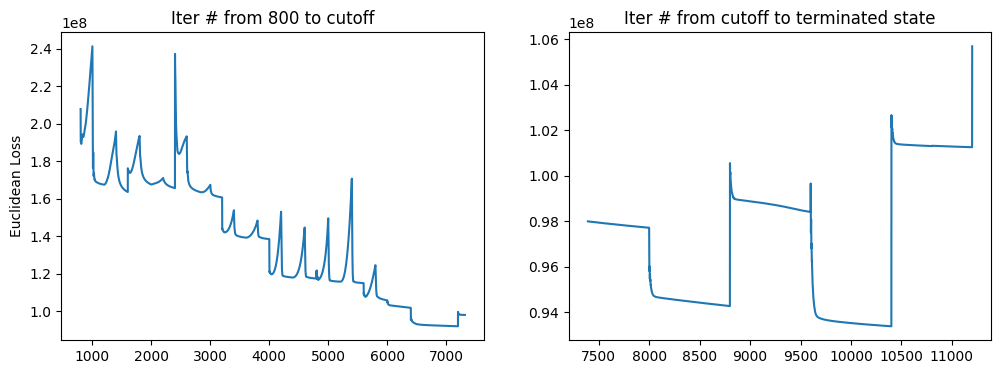

/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Loss (Total): 105699203.211, (Spliced): 51480377.806, (Unspliced): 54218825.405:  93%|█████████▎| 11201/12000 [04:02<00:17, 46.25it/s]

Total loss 93378281.061, vgene loss 105699203.211


  0%|          | 0/1000 [00:00<?, ?cells/s]

... storing 'cluster' as categorical


Run 18, dataset 8.
------> Manully Specified Parameters <------
GPU:	-1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /ictstr01/groups/ml01/workspace/yifan.chen/regvelo_reproducibility/notebooks/dyngen/complexity_1.
Results will be stored in res folder


/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Extracted 382 highly variable genes.
Computing moments for 382 genes with n_neighbors: 30 and n_pcs: 30

# of velocity genes 326 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 326 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 326 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.


Loss (Total): 66.943, (Spliced): 33.534, (Unspliced): 33.410:  80%|████████  | 9601/12000 [03:07<04:28,  8.95it/s] 

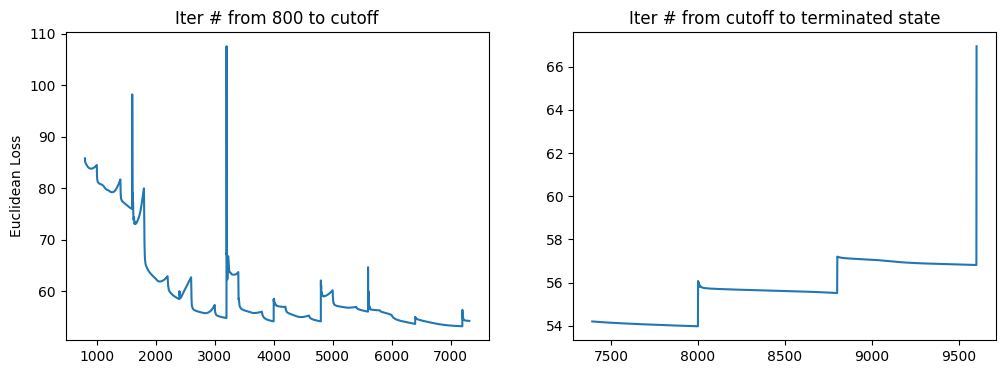

/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Loss (Total): 66.943, (Spliced): 33.534, (Unspliced): 33.410:  80%|████████  | 9601/12000 [03:10<00:47, 50.50it/s]

Total loss 53.973, vgene loss 66.943


  0%|          | 0/1000 [00:00<?, ?cells/s]

... storing 'cluster' as categorical


Run 19, dataset 11.
------> Manully Specified Parameters <------
GPU:	-1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /ictstr01/groups/ml01/workspace/yifan.chen/regvelo_reproducibility/notebooks/dyngen/complexity_1.
Results will be stored in res folder


/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Extracted 353 highly variable genes.
Computing moments for 353 genes with n_neighbors: 30 and n_pcs: 30

# of velocity genes 353 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 353 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 353 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.


Loss (Total): 49.518, (Spliced): 27.798, (Unspliced): 21.720:  90%|████████▉ | 10799/12000 [03:30<00:23, 51.80it/s] 

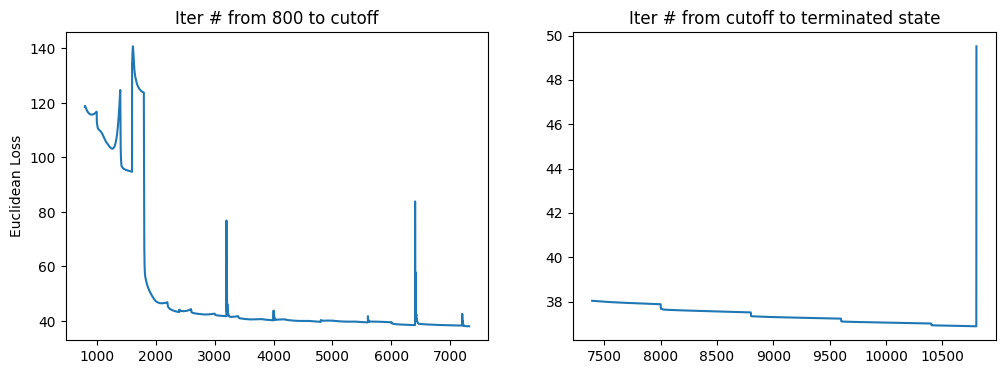

/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Loss (Total): 49.518, (Spliced): 27.798, (Unspliced): 21.720:  90%|█████████ | 10801/12000 [03:33<00:23, 50.57it/s]

Total loss 36.883, vgene loss 49.518


  0%|          | 0/1000 [00:00<?, ?cells/s]

... storing 'cluster' as categorical


Run 20, dataset 27.
------> Manully Specified Parameters <------
GPU:	-1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /ictstr01/groups/ml01/workspace/yifan.chen/regvelo_reproducibility/notebooks/dyngen/complexity_1.
Results will be stored in res folder


/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Extracted 366 highly variable genes.
Computing moments for 366 genes with n_neighbors: 30 and n_pcs: 30

# of velocity genes 318 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 318 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 318 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.


Loss (Total): 271.474, (Spliced): 126.483, (Unspliced): 144.991:  80%|████████  | 9600/12000 [03:06<00:46, 51.25it/s] 

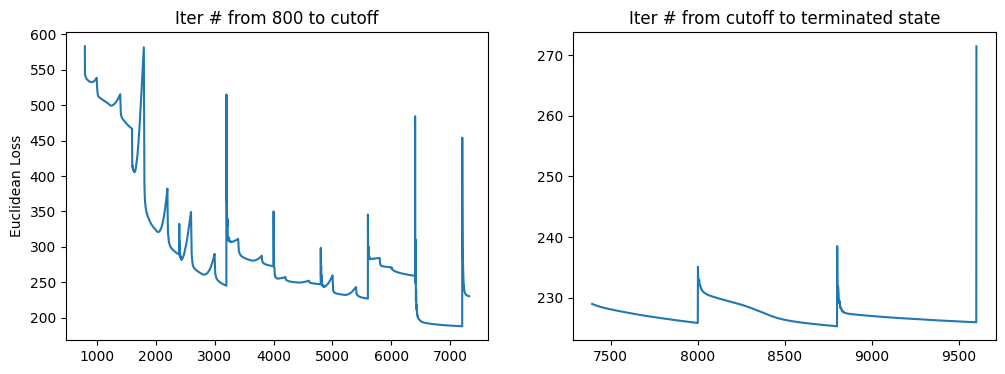

/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Loss (Total): 271.474, (Spliced): 126.483, (Unspliced): 144.991:  80%|████████  | 9601/12000 [03:08<00:47, 50.87it/s]

Total loss 225.296, vgene loss 271.474


  0%|          | 0/1000 [00:00<?, ?cells/s]

... storing 'cluster' as categorical


Run 21, dataset 23.
------> Manully Specified Parameters <------
GPU:	-1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /ictstr01/groups/ml01/workspace/yifan.chen/regvelo_reproducibility/notebooks/dyngen/complexity_1.
Results will be stored in res folder


/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Extracted 283 highly variable genes.
Computing moments for 283 genes with n_neighbors: 30 and n_pcs: 30

# of velocity genes 283 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 283 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 283 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.


Loss (Total): 26.089, (Spliced): 16.948, (Unspliced): 9.142:  90%|█████████ | 10801/12000 [03:15<00:22, 54.00it/s] 

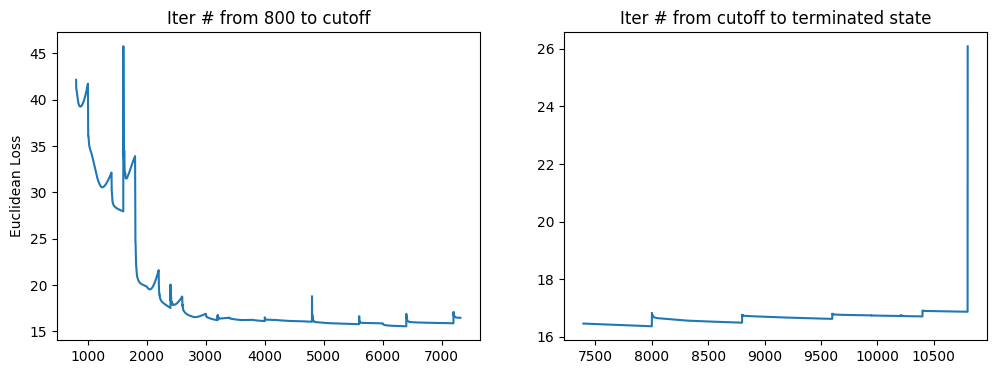

/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Loss (Total): 26.089, (Spliced): 16.948, (Unspliced): 9.142:  90%|█████████ | 10801/12000 [03:17<00:21, 54.67it/s]

Total loss 16.362, vgene loss 26.089


  0%|          | 0/1000 [00:00<?, ?cells/s]

... storing 'cluster' as categorical


Run 22, dataset 17.
------> Manully Specified Parameters <------
GPU:	-1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /ictstr01/groups/ml01/workspace/yifan.chen/regvelo_reproducibility/notebooks/dyngen/complexity_1.
Results will be stored in res folder


/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Extracted 343 highly variable genes.
Computing moments for 343 genes with n_neighbors: 30 and n_pcs: 30

# of velocity genes 332 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 332 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 332 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.


Loss (Total): 41.262, (Spliced): 19.837, (Unspliced): 21.425:  67%|██████▋   | 7998/12000 [02:28<01:17, 51.75it/s] 

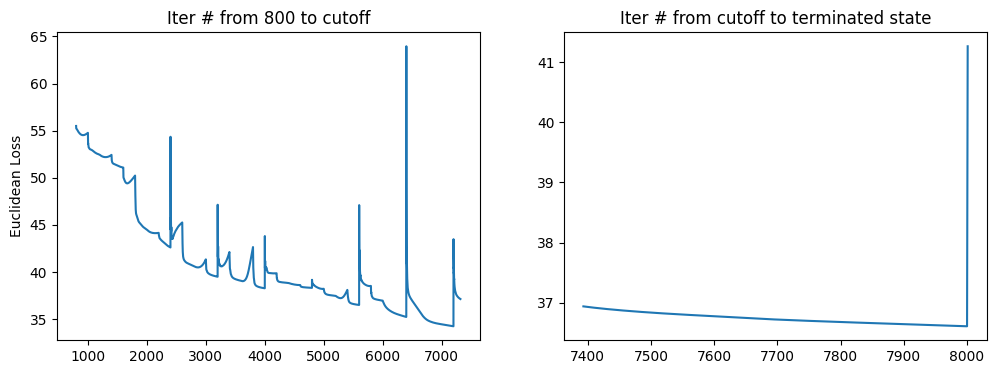

/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Loss (Total): 41.262, (Spliced): 19.837, (Unspliced): 21.425:  67%|██████▋   | 8001/12000 [02:30<01:15, 53.01it/s]

Total loss 36.610, vgene loss 41.262


  0%|          | 0/1000 [00:00<?, ?cells/s]

... storing 'cluster' as categorical


Run 23, dataset 30.
------> Manully Specified Parameters <------
GPU:	-1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /ictstr01/groups/ml01/workspace/yifan.chen/regvelo_reproducibility/notebooks/dyngen/complexity_1.
Results will be stored in res folder


/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Extracted 464 highly variable genes.
Computing moments for 464 genes with n_neighbors: 30 and n_pcs: 30

# of velocity genes 399 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 399 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 399 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.


Loss (Total): 2359.715, (Spliced): 1178.461, (Unspliced): 1181.254:  67%|██████▋   | 8000/12000 [02:42<01:20, 49.96it/s] 

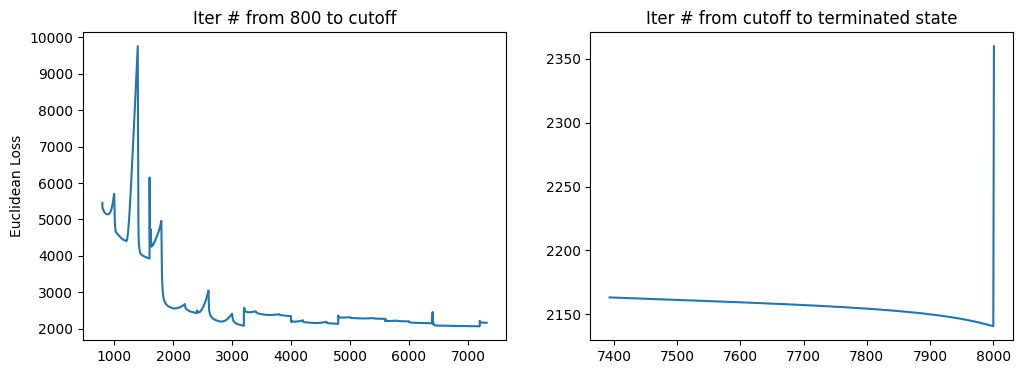

/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Loss (Total): 2359.715, (Spliced): 1178.461, (Unspliced): 1181.254:  67%|██████▋   | 8001/12000 [02:45<01:22, 48.33it/s]

Total loss 2140.709, vgene loss 2359.715


  0%|          | 0/1000 [00:00<?, ?cells/s]

... storing 'cluster' as categorical


Run 24, dataset 22.
------> Manully Specified Parameters <------
GPU:	-1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /ictstr01/groups/ml01/workspace/yifan.chen/regvelo_reproducibility/notebooks/dyngen/complexity_1.
Results will be stored in res folder


/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Extracted 273 highly variable genes.
Computing moments for 273 genes with n_neighbors: 30 and n_pcs: 30

# of velocity genes 271 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 271 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 271 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.


Loss (Total): 29.155, (Spliced): 17.958, (Unspliced): 11.197:  90%|████████▉ | 10799/12000 [03:15<00:21, 55.23it/s]

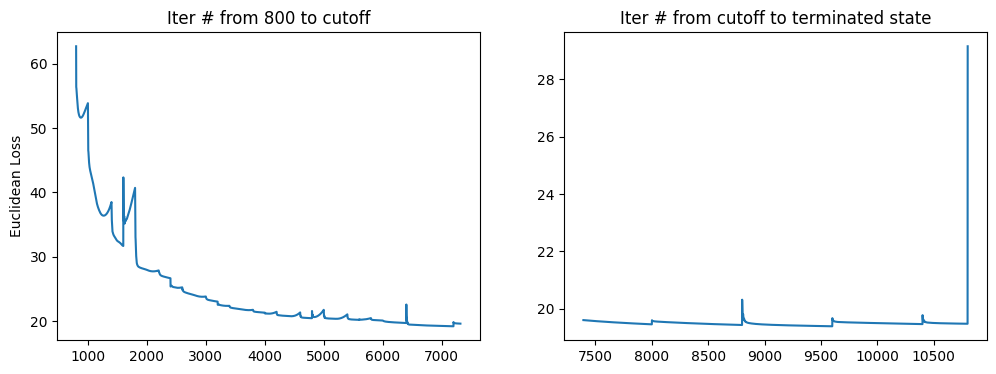

/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Loss (Total): 29.155, (Spliced): 17.958, (Unspliced): 11.197:  90%|█████████ | 10801/12000 [03:17<00:21, 54.73it/s]

Total loss 19.384, vgene loss 29.155


  0%|          | 0/1000 [00:00<?, ?cells/s]

... storing 'cluster' as categorical


Run 25, dataset 25.
------> Manully Specified Parameters <------
GPU:	-1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /ictstr01/groups/ml01/workspace/yifan.chen/regvelo_reproducibility/notebooks/dyngen/complexity_1.
Results will be stored in res folder


/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Extracted 576 highly variable genes.
Computing moments for 576 genes with n_neighbors: 30 and n_pcs: 30

# of velocity genes 453 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 453 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 453 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.


Loss (Total): 3124.003, (Spliced): 1497.846, (Unspliced): 1626.157: 100%|█████████▉| 11998/12000 [04:40<00:00, 41.27it/s]

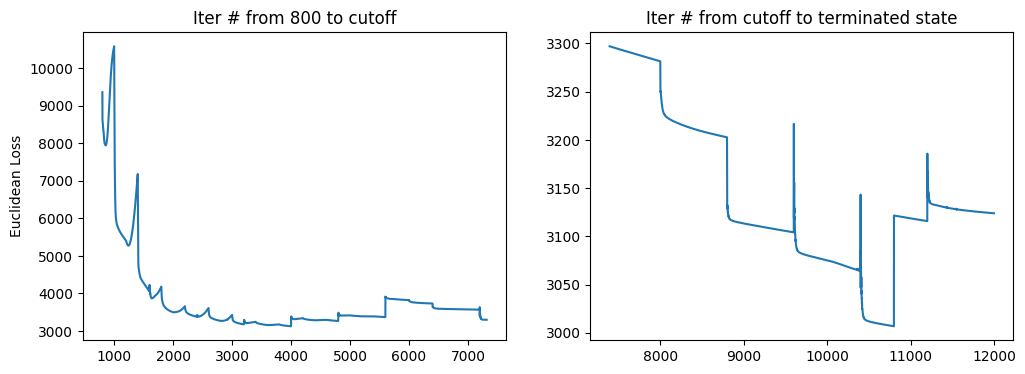

/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Loss (Total): 3124.003, (Spliced): 1497.846, (Unspliced): 1626.157: 100%|█████████▉| 11999/12000 [04:44<00:00, 42.17it/s]

Total loss 3006.866, vgene loss 3124.003


  0%|          | 0/1000 [00:00<?, ?cells/s]

... storing 'cluster' as categorical


Run 26, dataset 20.
------> Manully Specified Parameters <------
GPU:	-1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /ictstr01/groups/ml01/workspace/yifan.chen/regvelo_reproducibility/notebooks/dyngen/complexity_1.
Results will be stored in res folder


/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Extracted 207 highly variable genes.
Computing moments for 207 genes with n_neighbors: 30 and n_pcs: 30

# of velocity genes 205 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 205 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 205 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.


Loss (Total): 76.315, (Spliced): 37.650, (Unspliced): 38.666:  67%|██████▋   | 7996/12000 [02:06<01:06, 60.04it/s] 

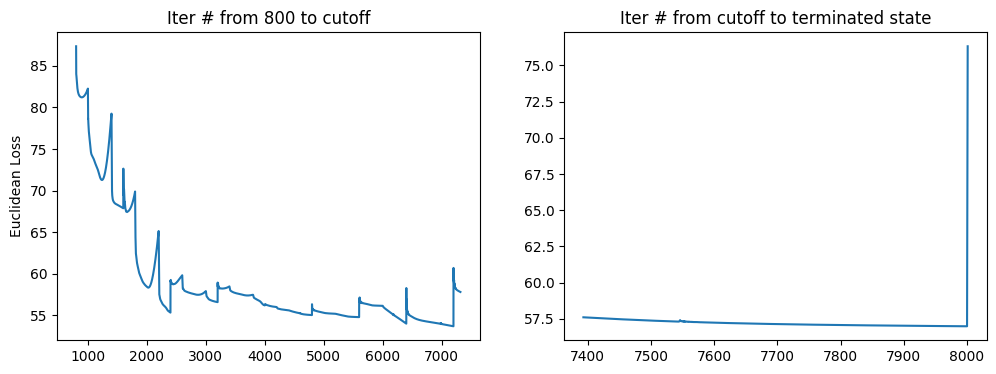

/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Loss (Total): 76.315, (Spliced): 37.650, (Unspliced): 38.666:  67%|██████▋   | 8001/12000 [02:08<01:03, 62.48it/s]

Total loss 56.982, vgene loss 76.315


  0%|          | 0/1000 [00:00<?, ?cells/s]

... storing 'cluster' as categorical


Run 27, dataset 7.
------> Manully Specified Parameters <------
GPU:	-1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /ictstr01/groups/ml01/workspace/yifan.chen/regvelo_reproducibility/notebooks/dyngen/complexity_1.
Results will be stored in res folder


/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Extracted 479 highly variable genes.
Computing moments for 479 genes with n_neighbors: 30 and n_pcs: 30

# of velocity genes 348 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 348 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 348 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.


Loss (Total): 2275.929, (Spliced): 1148.613, (Unspliced): 1127.316:  67%|██████▋   | 7998/12000 [02:41<01:21, 49.07it/s] 

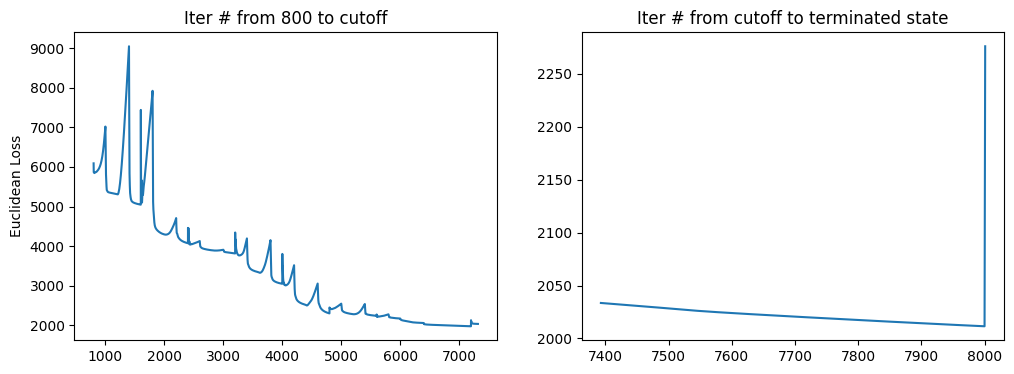

/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Loss (Total): 2275.929, (Spliced): 1148.613, (Unspliced): 1127.316:  67%|██████▋   | 8001/12000 [02:44<01:22, 48.53it/s]

Total loss 2011.518, vgene loss 2275.929


  0%|          | 0/1000 [00:00<?, ?cells/s]

... storing 'cluster' as categorical


Run 28, dataset 3.
------> Manully Specified Parameters <------
GPU:	-1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /ictstr01/groups/ml01/workspace/yifan.chen/regvelo_reproducibility/notebooks/dyngen/complexity_1.
Results will be stored in res folder


/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Extracted 208 highly variable genes.
Computing moments for 208 genes with n_neighbors: 30 and n_pcs: 30

# of velocity genes 172 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 172 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 172 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.


Loss (Total): 85481448.186, (Spliced): 36976961.488, (Unspliced): 48504486.698: 100%|█████████▉| 11999/12000 [03:18<00:00, 53.20it/s]  

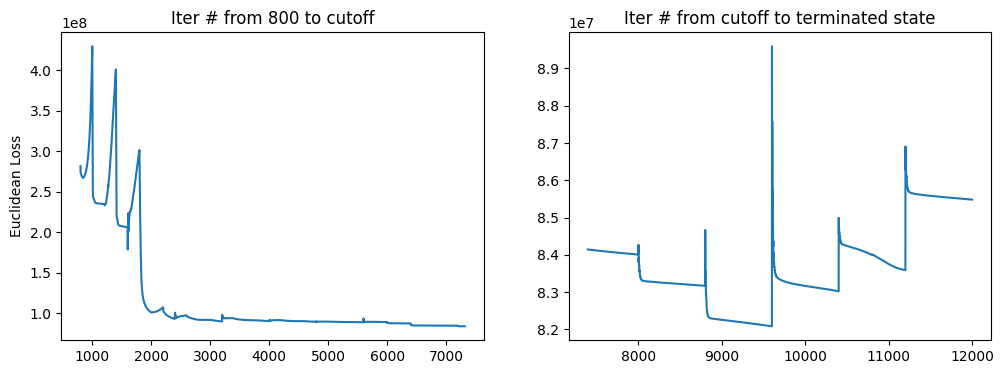

/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Loss (Total): 85481448.186, (Spliced): 36976961.488, (Unspliced): 48504486.698: 100%|█████████▉| 11999/12000 [03:19<00:00, 60.07it/s]

Total loss 82081738.419, vgene loss 85481448.186


  0%|          | 0/1000 [00:00<?, ?cells/s]

... storing 'cluster' as categorical


Run 29, dataset 26.
------> Manully Specified Parameters <------
GPU:	-1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /ictstr01/groups/ml01/workspace/yifan.chen/regvelo_reproducibility/notebooks/dyngen/complexity_1.
Results will be stored in res folder


/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Extracted 399 highly variable genes.
Computing moments for 399 genes with n_neighbors: 30 and n_pcs: 30

# of velocity genes 398 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 398 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 398 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.


Loss (Total): 19.597, (Spliced): 8.786, (Unspliced): 10.811:  87%|████████▋ | 10401/12000 [03:32<03:22,  7.91it/s] 

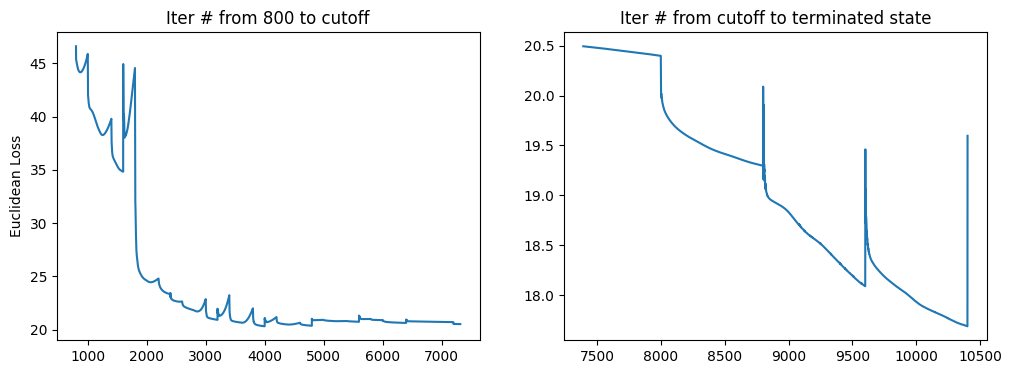

/home/icb/yifan.chen/miniconda3/envs/regvelo-py310/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Loss (Total): 19.597, (Spliced): 8.786, (Unspliced): 10.811:  87%|████████▋ | 10401/12000 [03:35<00:33, 48.17it/s]

Total loss 17.686, vgene loss 19.597


  0%|          | 0/1000 [00:00<?, ?cells/s]

... storing 'cluster' as categorical


In [9]:
velocity_correlation = []

cnt = 0
for filename in (DATA_DIR / DATASET / COMPLEXITY / "processed").iterdir():
    if filename.suffix != ".zarr":
        continue

    simulation_id = int(filename.stem.removeprefix("simulation_"))
    print(f"Run {cnt}, dataset {simulation_id}.")

    adata = ad.io.read_zarr(filename)
    adata.var["highly_variable"] = True

    adata.obs["cluster"] = "0"
    adata = utv.run_model(adata, label="cluster", config_file=velo_config)

    # save data
    adata.write_zarr(DATA_DIR / DATASET / COMPLEXITY / "trained_unitvelo" / f"trained_{simulation_id}.zarr")

    velocity_correlation.append(
        get_velocity_correlation(
            ground_truth=adata.layers["true_velocity"], estimated=adata.layers["velocity"], aggregation=np.mean
        )
    )

    cnt += 1

## Data saving

In [11]:
if SAVE_DATA:
    pd.DataFrame({"velocity": velocity_correlation}).to_parquet(
        path=DATA_DIR / DATASET / COMPLEXITY / "results" / "unitvelo_correlation.parquet"
    )